# Forecasting CO2 Emissions Using Environmental Data (SDG 13: Climate Action)

### Objective
Build a supervised regression model to predict CO2 Emissions using environmental features.

**Dataset:** `DATA_ONE.csv`

**Target Variable:** CO2 Emissions

**Features:** Temperature, Sea Level Rise, Precipitation, Humidity, Wind Speed

In [22]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import drive
import joblib

To access files from Google Drive, you need to mount your Drive to the Colab environment.

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After running the code above and authorizing, you can access your files in `/content/drive/My Drive/`.

In [24]:
file_path = '/content/drive/MyDrive/Colab_Notebooks/DATA_ONE.csv'
df = pd.read_csv(file_path)

# Check the data
print("Data loaded. Shape:", df.shape)
df.info()
df.describe()
df.head()
df.head()


Data loaded. Shape: (10000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.3+ KB


,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,00:00.0,New Williamtown,Latvia,10.688986,403.118902,0.717506,13.835237,23.631256,18.492026
1,09:43.3,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,19:26.5,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,29:09.8,South David,Vietnam,12.309581,422.404984,-0.475931,5.193341,47.467938,8.554563
4,38:53.0,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


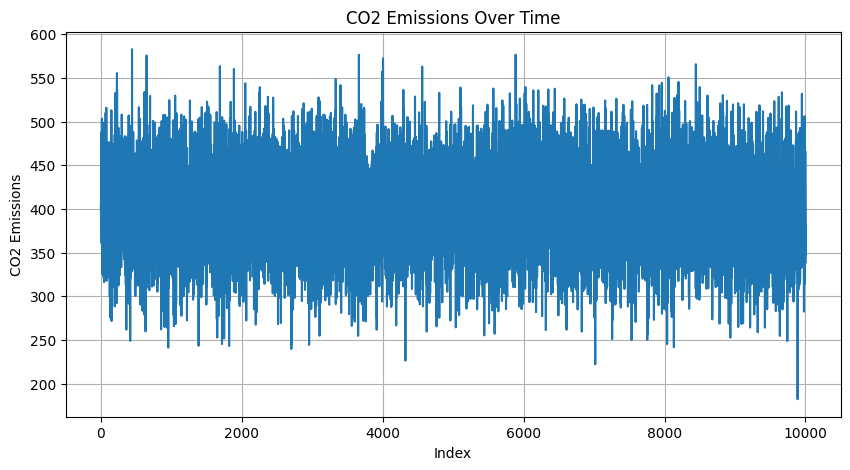

In [25]:
# 3. Visualize Initial Trends
plt.figure(figsize=(10,5))
df['CO2 Emissions'].plot(kind='line')
plt.title('CO2 Emissions Over Time')
plt.ylabel('CO2 Emissions')
plt.xlabel('Index')
plt.grid(True)
plt.show()

In [26]:
# 4. Preprocessing
# Drop non-numeric or non-useful features for now
df = df.drop(['Date', 'Location', 'Country'], axis=1)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64


In [27]:
# Normalize features
X = df.drop('CO2 Emissions', axis=1)
y = df['CO2 Emissions']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
# 5. Train Models
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [29]:
# 6. Evaluate Models
def evaluate(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("R2 Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))


evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")

--- Linear Regression ---
R2 Score: -0.000647369448658619
MAE: 38.16549917626433
RMSE: 48.51462425967336
--- Random Forest ---
R2 Score: -0.04521736219385075
MAE: 38.90451932744
RMSE: 49.58330263170747


# 7. Visualizations
# ----------------- Correlation heatmap --------------------

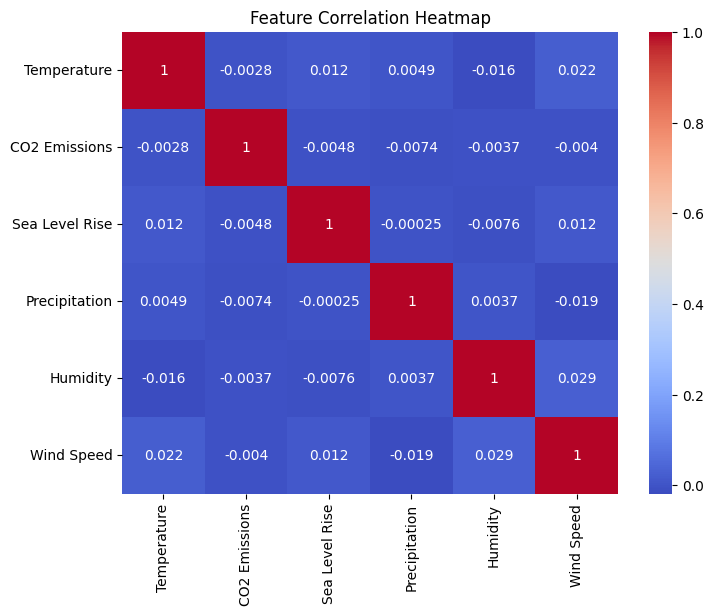

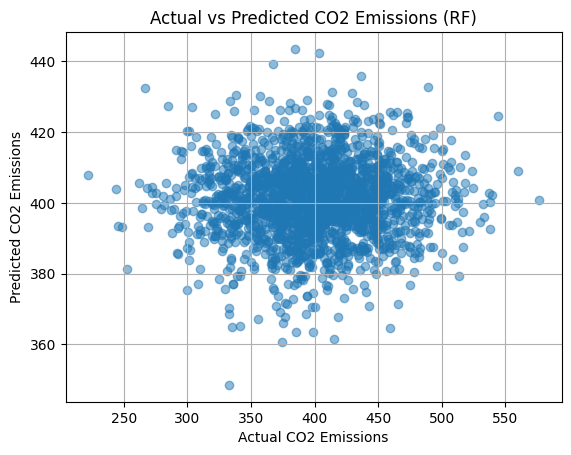

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Actual vs predicted (Random Forest)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions (RF)")
plt.grid(True)
plt.show()

# Feature Importance

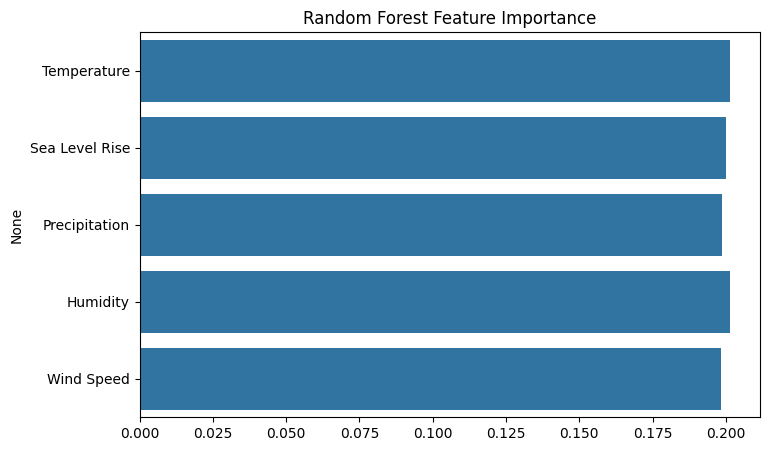

In [31]:
feat_importance = rf.feature_importances_
features = df.drop('CO2 Emissions', axis=1).columns

plt.figure(figsize=(8,5))
sns.barplot(x=feat_importance, y=features)
plt.title("Random Forest Feature Importance")
plt.show()

In [32]:
# Bonus: Save model
joblib.dump(rf, 'co2_rf_model.joblib')
print("Model saved as co2_rf_model.joblib")

Model saved as co2_rf_model.joblib
